In [ ]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [ ]:
#import dataset and model
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier


In [ ]:
#load dataset
mnist = fetch_openml('mnist_784', version=1)

X = mnist.data
y = mnist.target.astype(int)

print(X.shape)  # (70000, 784)
print(y.shape)

(70000, 784)
(70000,)


In [42]:
print(X_train.shape)
print(y_train.shape)

(56000, 28, 28, 1)
(56000, 10)


In [ ]:
#check shape
print(type(X_train))
print(X_train.shape)

<class 'numpy.ndarray'>
(56000, 28, 28, 1)


In [ ]:
#Check Data shape
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)

X_train shape: (56000, 28, 28, 1)
X_test shape: (14000, 28, 28, 1)
y_train shape: (56000,)


In [ ]:
#One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("New y_train shape:", y_train.shape)

New y_train shape: (56000, 10)


In [30]:
cnn_model = Sequential([
    
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    
    Dense(128, activation='relu'),
    
    Dense(10, activation='softmax')
])

c:\Desktop\AK\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [32]:
history = cnn_model.fit(
    X_train,
    y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/5
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7772 - loss: 0.6763 - val_accuracy: 0.9102 - val_loss: 0.3024
Epoch 2/5
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 38s 27ms/step - accuracy: 0.9312 - loss: 0.2248 - val_accuracy: 0.9475 - val_loss: 0.1727
Epoch 3/5
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 33s 24ms/step - accuracy: 0.9563 - loss: 0.1425 - val_accuracy: 0.9596 - val_loss: 0.1213
Epoch 4/5
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.9662 - loss: 0.1086 - val_accuracy: 0.9697 - val_loss: 0.0927
Epoch 5/5
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 45s 32ms/step - accuracy: 0.9723 - loss: 0.0905 - val_accuracy: 0.9722 - val_loss: 0.0839


In [33]:
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)

print("CNN Test Accuracy:", test_accuracy)

438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9709 - loss: 0.0997
CNN Test Accuracy: 0.9708571434020996


438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


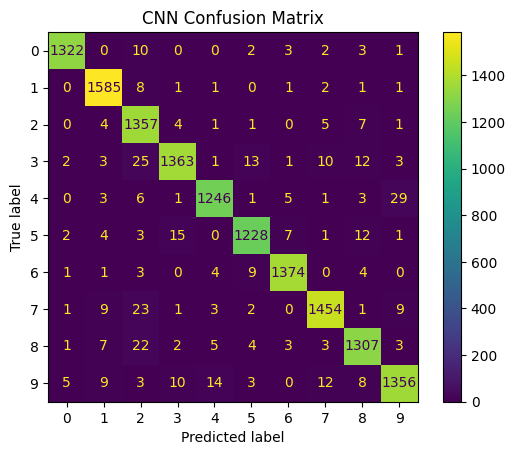

In [34]:
y_pred = cnn_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("CNN Confusion Matrix")
plt.show()

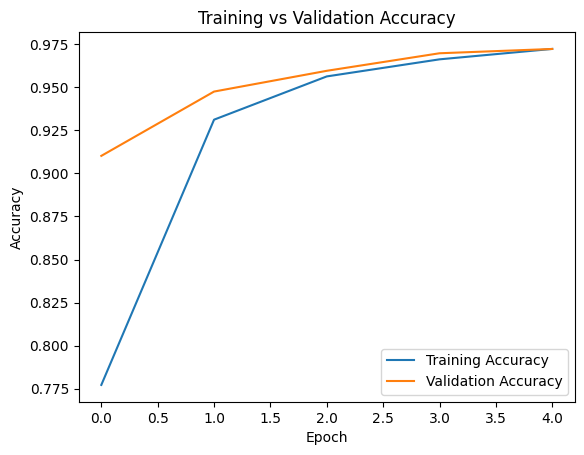

In [35]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

In [43]:
y_train_lr = np.argmax(y_train, axis=1)
y_test_lr = np.argmax(y_test, axis=1)

print(y_train_lr.shape)

(56000,)


In [44]:
X_train_lr = X_train.reshape(X_train.shape[0], -1)
X_test_lr = X_test.reshape(X_test.shape[0], -1)

print(X_train_lr.shape)

(56000, 784)


In [45]:
from sklearn.model_selection import train_test_split

X_train_lr_split, X_val_lr, y_train_lr_split, y_val_lr = train_test_split(
    X_train_lr,
    y_train_lr,
    test_size=0.2,
    random_state=42
)

In [46]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=200, solver='saga', n_jobs=-1)

lr_model.fit(X_train_lr_split, y_train_lr_split)

c:\Desktop\AK\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [59]:
train_acc_lr = lr_model.score(X_train_lr_split, y_train_lr_split)
print("Training Accuracy:", train_acc_lr)
val_acc_lr = lr_model.score(X_val_lr, y_val_lr)
print("Validation Accuracy:", val_acc_lr)
test_acc_lr = lr_model.score(X_test_lr, y_test_lr)
print("Test Accuracy:", test_acc_lr)




Training Accuracy: 0.7469196428571429
Validation Accuracy: 0.7438392857142857
Test Accuracy: 0.7485


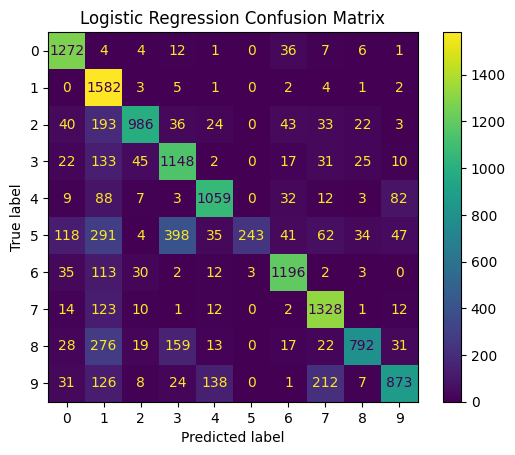

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_lr = lr_model.predict(X_test_lr)

cm_lr = confusion_matrix(y_test_lr, y_pred_lr)

ConfusionMatrixDisplay(cm_lr).plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

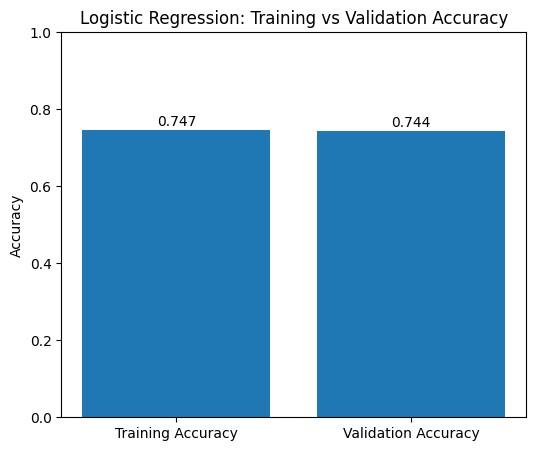

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))

accuracies = [train_acc_lr, val_acc_lr]
labels = ["Training Accuracy", "Validation Accuracy"]

plt.bar(labels, accuracies)

plt.ylim(0, 1)   # <-- FIXED
plt.ylabel("Accuracy")
plt.title("Logistic Regression: Training vs Validation Accuracy")

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')

plt.show()

In [60]:
print("----------- Model Performance Comparison -----------")

print(f"Logistic Regression Test Accuracy : {test_acc_lr:.4f}")
print(f"CNN Test Accuracy                 : {test_accuracy:.4f}")

----------- Model Performance Comparison -----------
Logistic Regression Test Accuracy : 0.7485
CNN Test Accuracy                 : 0.9709


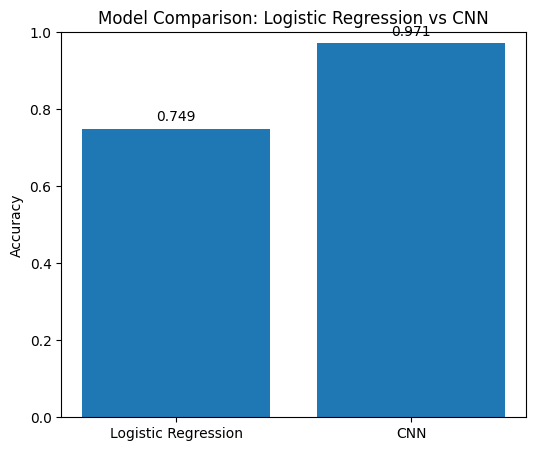

In [61]:
import matplotlib.pyplot as plt

models = ["Logistic Regression", "CNN"]
accuracies = [test_acc_lr, test_accuracy]

plt.figure(figsize=(6,5))
plt.bar(models, accuracies)

plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Comparison: Logistic Regression vs CNN")

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.3f}", ha='center')

plt.show()